In [2]:
import matplotlib.image as img
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
image = img.imread('test_images/solidYellowCurve2.jpg')

In [4]:
import sys
print(sys.maxsize)

9223372036854775807


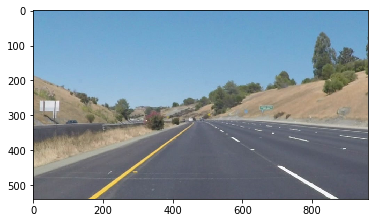

In [5]:
plt.imshow(image)

In [6]:
print(image.shape)

(540, 960, 3)


In [7]:
color_image = np.copy(image)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

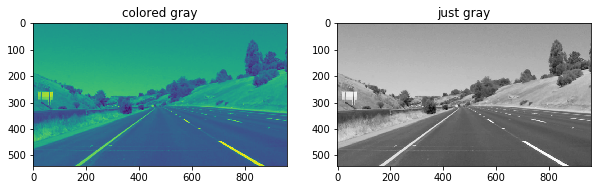

In [9]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(121)
ax1.set_title('colored gray')
ax1.imshow(gray)
ax2 = fig.add_subplot(122)
ax2.set_title('just gray')
ax2.imshow(gray, cmap='Greys_r')
fig.savefig('test_images/combinedImages.jpg')

In [8]:
color_threshold = [200, 200, 200]
color_filter = (image[:,:,0] < color_threshold[0]) | (image[:,:,1] < color_threshold[1]) | (image[:,:,2] < color_threshold[2]) 


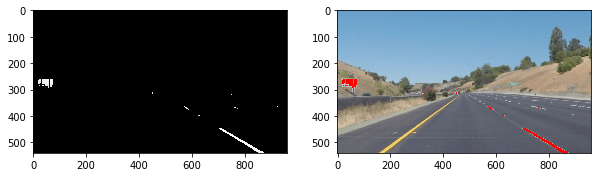

In [9]:
gray[color_filter] = 0
color_image[~color_filter] = [255,0,0]
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(gray, cmap = 'Greys_r')
plt.subplot(122)
plt.imshow(color_image)



In [10]:
cropped_image = np.copy(image)

In [11]:
left_bottom = [0, image.shape[0]]
right_bottom = [image.shape[1] , image.shape[0]]
apex = [500, 250]
print(left_bottom)
print(right_bottom)

[0, 540]
[960, 540]


In [12]:
left_fit = np.polyfit((left_bottom[0],apex[0]),(left_bottom[1],apex[1]),1)
right_fit = np.polyfit((right_bottom[0],apex[0]),(right_bottom[1],apex[1]),1)
bottom_fit = np.polyfit((right_bottom[0],left_bottom[0]),(right_bottom[1],left_bottom[1]),1)

In [13]:
XX,YY = np.meshgrid(np.arange(0,image.shape[1]), np.arange(0,image.shape[0]))

In [14]:
region_select = (YY > XX*left_fit[0] + left_fit[1]) & \
                (YY > XX*right_fit[0] + right_fit[1]) & \
                (YY < XX*bottom_fit[0] + bottom_fit[1])

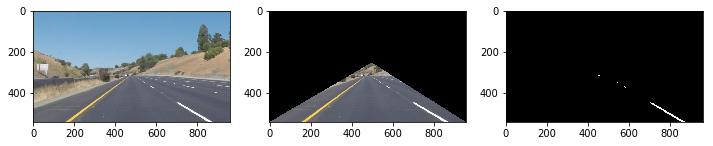

In [15]:
plt.figure(figsize=(12,12))
plt.subplot(131)
plt.imshow(image)
cropped_image[~region_select] = 0
plt.subplot(132)
plt.imshow(cropped_image)
cropped_image[color_filter] = 0
plt.subplot(133)
plt.imshow(cropped_image)


In [22]:
import cv2
image = img.imread('solidYellowCurve2.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
image_canny_gray = cv2.Canny(gray,50,120)
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
image_canny_blur = cv2.Canny(blur_gray,50,120)

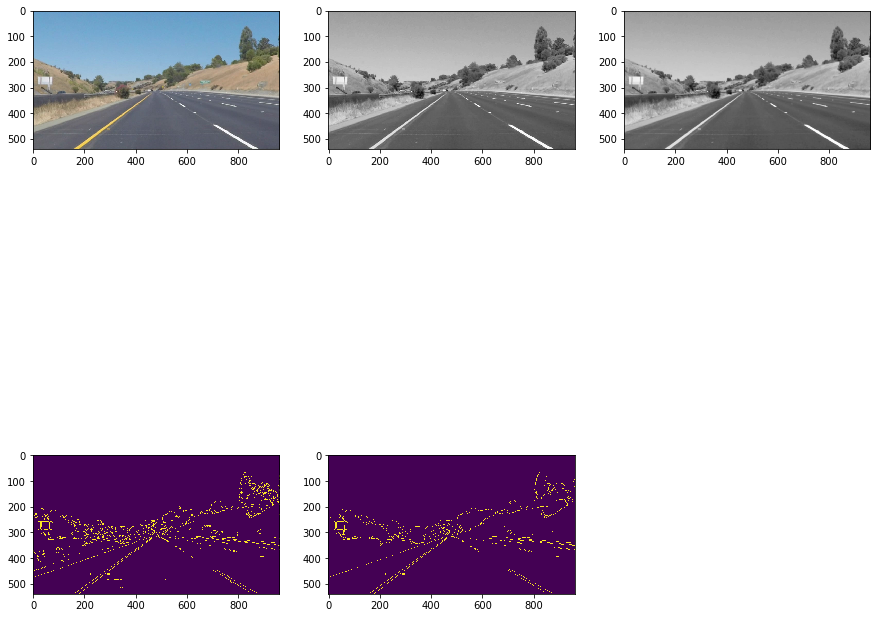

In [23]:
plt.figure(figsize=(15,15))
plt.subplot(231)
plt.imshow(image)
plt.subplot(232)
plt.imshow(gray, cmap='Greys_r')
plt.subplot(233)
plt.imshow(blur_gray, cmap='Greys_r')
plt.subplot(234)
plt.imshow(image_canny_gray)
plt.subplot(235)
plt.imshow(image_canny_blur)

In [38]:
mask = np.zeros_like(image_canny_blur)
ignore_mask_color = 255
#vertices = np.array([[(),(),(),()]],dtype=np.int32)
imshape=image.shape
vertices = np.array([[(50,imshape[0]),(460, 300), (490, 300), (imshape[1] - 20,imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(image_canny_blur, mask)
cropped_Image_select = cv2.bitwise_and(gray, mask)

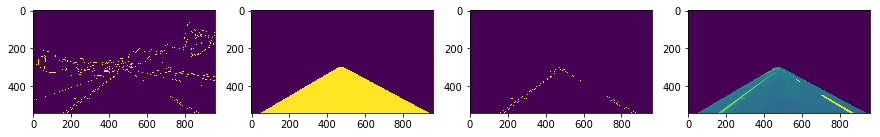

In [43]:
plt.figure(figsize=(15,15))
plt.subplot(141)
plt.imshow(image_canny_blur)
plt.subplot(142)
plt.imshow(mask)
plt.subplot(143)
plt.imshow(masked_edges)
plt.subplot(144)
plt.imshow(cropped_Image_select)

In [41]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 2 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 50     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50 #minimum number of pixels making up a line
max_line_gap = 15    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((image_canny_blur, image_canny_blur, image_canny_blur)) 

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(image, 0.8, line_image, 1, 0) 
#plt.imshow(lines_edges)

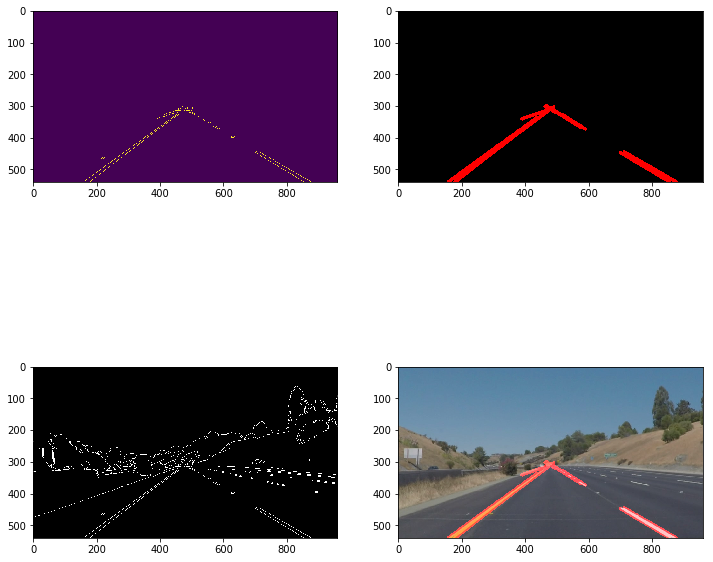

In [42]:
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(masked_edges)
plt.subplot(222)
plt.imshow(line_image)
plt.subplot(223)
plt.imshow(color_edges)
plt.subplot(224)
plt.imshow(lines_edges)

